In [62]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix



In [63]:
df = pd.read_csv("realistic_kraljic_dataset.csv")
df

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
0,P001,Semiconductors,South America,81,171,255.03,5,5,4,Yes,Strategic
1,P002,Semiconductors,South America,8,763,380.33,5,4,4,Yes,Strategic
2,P003,Pharma APIs,Asia,65,413,385.24,4,5,5,Yes,Strategic
3,P004,Semiconductors,South America,70,882,287.64,5,5,5,Yes,Strategic
4,P005,Lithium Batteries,Asia,15,120,382.26,4,4,4,Yes,Strategic
...,...,...,...,...,...,...,...,...,...,...,...
995,P996,Printer Ink,Global,19,19648,10.20,2,1,1,No,Non-Critical
996,P997,Cleaning Supplies,Global,21,19143,15.30,1,2,1,No,Non-Critical
997,P998,Uniforms,Global,70,5352,30.23,1,3,2,No,Non-Critical
998,P999,Printer Ink,Global,44,18070,30.73,1,1,2,No,Non-Critical


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   object 
 1   Product_Name          1000 non-null   object 
 2   Supplier_Region       1000 non-null   object 
 3   Lead_Time_Days        1000 non-null   int64  
 4   Order_Volume_Units    1000 non-null   int64  
 5   Cost_per_Unit         1000 non-null   float64
 6   Supply_Risk_Score     1000 non-null   int64  
 7   Profit_Impact_Score   1000 non-null   int64  
 8   Environmental_Impact  1000 non-null   int64  
 9   Single_Source_Risk    1000 non-null   object 
 10  Kraljic_Category      1000 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


In [65]:
print(df.shape)

(1000, 11)


In [66]:
df.columns

Index(['Product_ID', 'Product_Name', 'Supplier_Region', 'Lead_Time_Days',
       'Order_Volume_Units', 'Cost_per_Unit', 'Supply_Risk_Score',
       'Profit_Impact_Score', 'Environmental_Impact', 'Single_Source_Risk',
       'Kraljic_Category'],
      dtype='object')

In [67]:
print(df.describe())#Statical value

       Lead_Time_Days  Order_Volume_Units  Cost_per_Unit  Supply_Risk_Score  \
count     1000.000000         1000.000000    1000.000000        1000.000000   
mean        47.508000         4753.182000     169.390440           2.988000   
std         23.630454         5625.105273     132.104809           1.537602   
min          7.000000           50.000000      10.090000           1.000000   
25%         27.000000          363.000000      50.460000           1.000000   
50%         48.000000         1105.500000     130.640000           3.000000   
75%         67.000000         8111.750000     255.165000           4.250000   
max         89.000000        19940.000000     499.320000           5.000000   

       Profit_Impact_Score  Environmental_Impact  
count          1000.000000           1000.000000  
mean              3.024000              2.778000  
std               1.542661              1.392356  
min               1.000000              1.000000  
25%               2.000000       

In [68]:
print(df.dtypes)


Product_ID               object
Product_Name             object
Supplier_Region          object
Lead_Time_Days            int64
Order_Volume_Units        int64
Cost_per_Unit           float64
Supply_Risk_Score         int64
Profit_Impact_Score       int64
Environmental_Impact      int64
Single_Source_Risk       object
Kraljic_Category         object
dtype: object


In [69]:
print(df.head())

  Product_ID       Product_Name Supplier_Region  Lead_Time_Days  \
0       P001     Semiconductors   South America              81   
1       P002     Semiconductors   South America               8   
2       P003        Pharma APIs            Asia              65   
3       P004     Semiconductors   South America              70   
4       P005  Lithium Batteries            Asia              15   

   Order_Volume_Units  Cost_per_Unit  Supply_Risk_Score  Profit_Impact_Score  \
0                 171         255.03                  5                    5   
1                 763         380.33                  5                    4   
2                 413         385.24                  4                    5   
3                 882         287.64                  5                    5   
4                 120         382.26                  4                    4   

   Environmental_Impact Single_Source_Risk Kraljic_Category  
0                     4                Yes        Stra

In [70]:
#missing valuses
print(df.isnull().sum())

Product_ID              0
Product_Name            0
Supplier_Region         0
Lead_Time_Days          0
Order_Volume_Units      0
Cost_per_Unit           0
Supply_Risk_Score       0
Profit_Impact_Score     0
Environmental_Impact    0
Single_Source_Risk      0
Kraljic_Category        0
dtype: int64


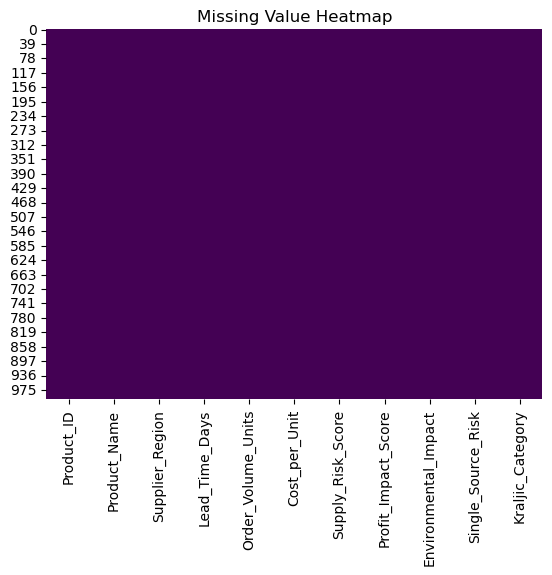

In [71]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

In [72]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_ID,1000,1000,P1000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Name,1000,16,Specialty Gases,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Supplier_Region,1000,6,Asia,269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lead_Time_Days,1000.0,NaN,NaN,NaN,47.508,23.630454,7.0,27.0,48.0,67.0,89.0
Order_Volume_Units,1000.0,NaN,NaN,NaN,4753.182,5625.105273,50.0,363.0,1105.5,8111.75,19940.0
Cost_per_Unit,1000.0,NaN,NaN,NaN,169.39044,132.104809,10.09,50.46,130.64,255.165,499.32
Supply_Risk_Score,1000.0,NaN,NaN,NaN,2.988,1.537602,1.0,1.0,3.0,4.25,5.0
Profit_Impact_Score,1000.0,NaN,NaN,NaN,3.024,1.542661,1.0,2.0,3.0,5.0,5.0
Environmental_Impact,1000.0,NaN,NaN,NaN,2.778,1.392356,1.0,2.0,2.5,4.0,5.0
Single_Source_Risk,1000,2,No,560,NaN,NaN,NaN,NaN,NaN,NaN,NaN


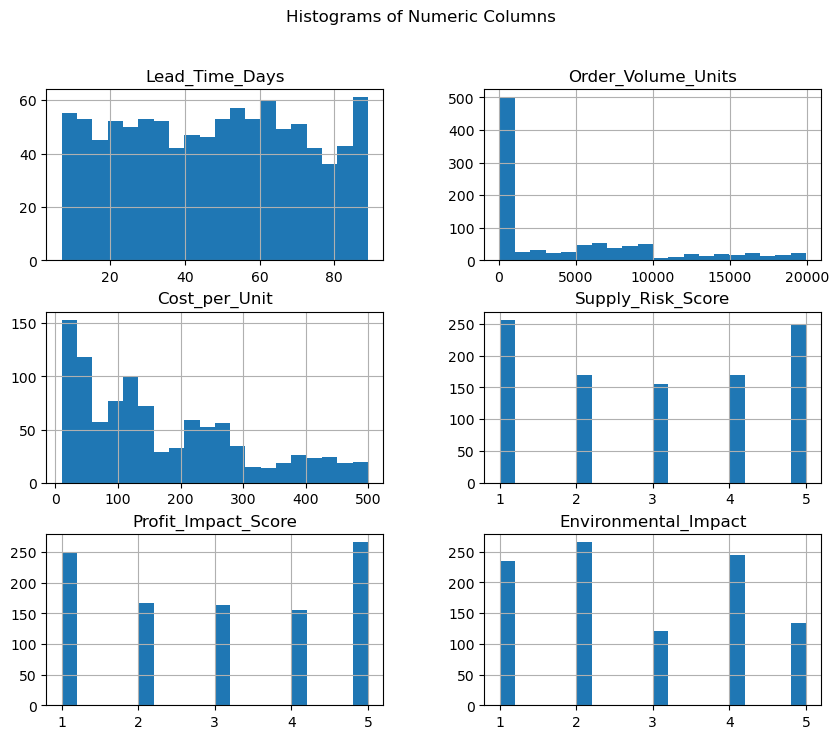

In [73]:
# 1. Histogram of numeric columns
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
df[numeric_cols].hist(figsize=(10,8), bins=20)
plt.suptitle("Histograms of Numeric Columns")
plt.show()



C:\Users\radha\AppData\Local\Temp\ipykernel_12712\910854713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


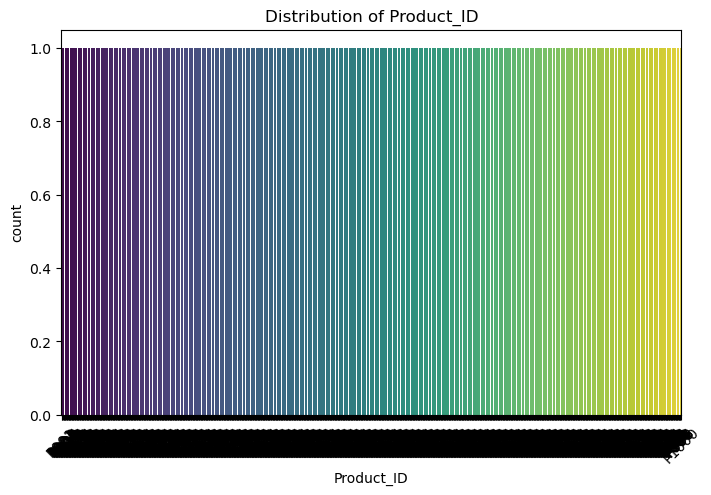

C:\Users\radha\AppData\Local\Temp\ipykernel_12712\910854713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


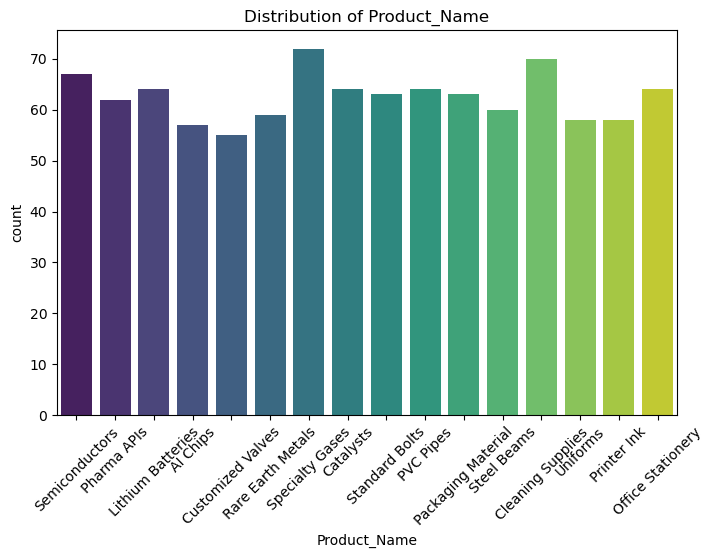

C:\Users\radha\AppData\Local\Temp\ipykernel_12712\910854713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


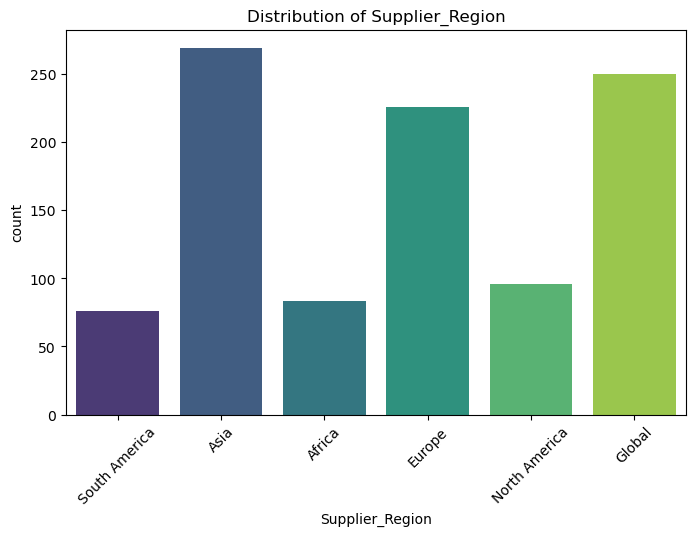

C:\Users\radha\AppData\Local\Temp\ipykernel_12712\910854713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


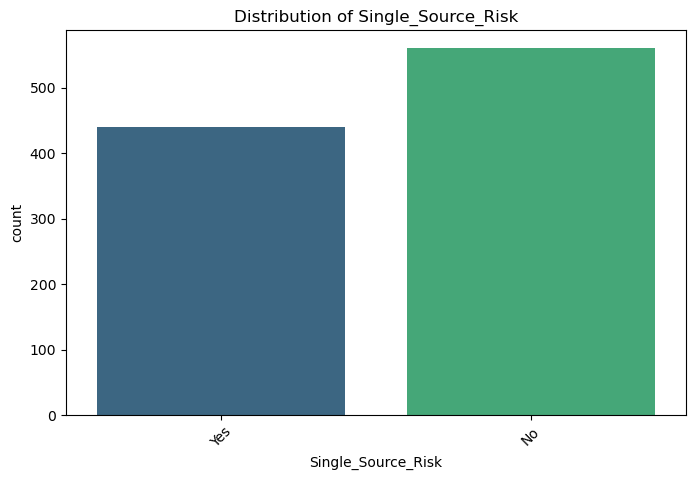

C:\Users\radha\AppData\Local\Temp\ipykernel_12712\910854713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


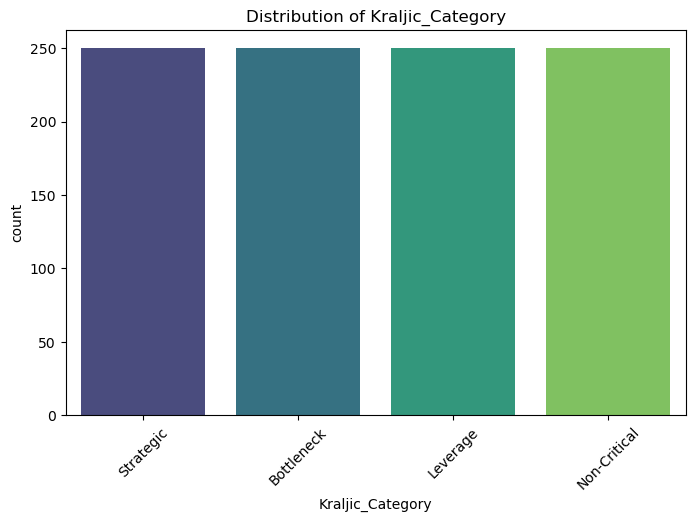

In [74]:
# 2. Bar chart of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, data=df, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


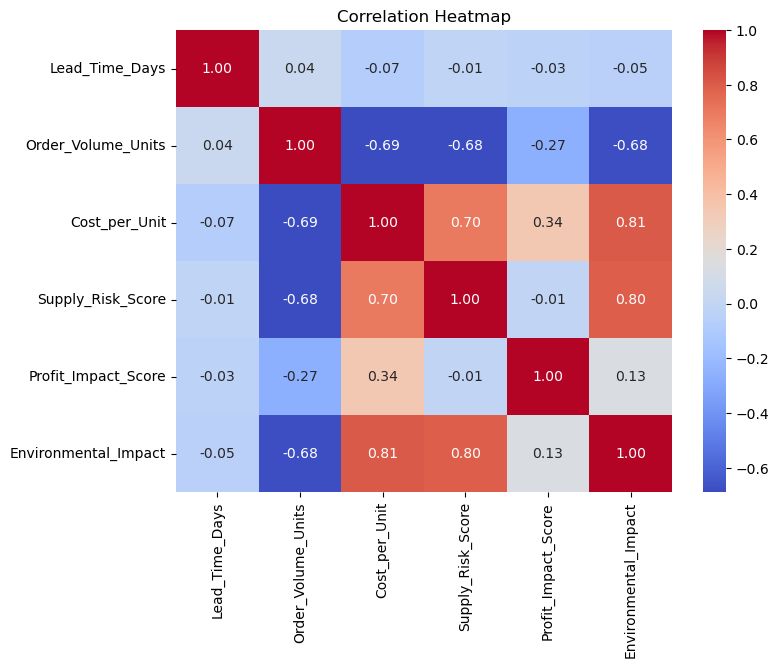

In [75]:
# 3. Correlation heatmap of numeric variables
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [76]:
df = pd.read_csv("realistic_kraljic_dataset.csv")
df

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
0,P001,Semiconductors,South America,81,171,255.03,5,5,4,Yes,Strategic
1,P002,Semiconductors,South America,8,763,380.33,5,4,4,Yes,Strategic
2,P003,Pharma APIs,Asia,65,413,385.24,4,5,5,Yes,Strategic
3,P004,Semiconductors,South America,70,882,287.64,5,5,5,Yes,Strategic
4,P005,Lithium Batteries,Asia,15,120,382.26,4,4,4,Yes,Strategic
...,...,...,...,...,...,...,...,...,...,...,...
995,P996,Printer Ink,Global,19,19648,10.20,2,1,1,No,Non-Critical
996,P997,Cleaning Supplies,Global,21,19143,15.30,1,2,1,No,Non-Critical
997,P998,Uniforms,Global,70,5352,30.23,1,3,2,No,Non-Critical
998,P999,Printer Ink,Global,44,18070,30.73,1,1,2,No,Non-Critical


In [77]:

df.tail()

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
995,P996,Printer Ink,Global,19,19648,10.20,2,1,1,No,Non-Critical
996,P997,Cleaning Supplies,Global,21,19143,15.30,1,2,1,No,Non-Critical
997,P998,Uniforms,Global,70,5352,30.23,1,3,2,No,Non-Critical
998,P999,Printer Ink,Global,44,18070,30.73,1,1,2,No,Non-Critical
999,P1000,Cleaning Supplies,Global,76,9018,29.98,1,3,1,No,Non-Critical


In [78]:
df['Product_Name'].unique()

array(['Semiconductors', 'Pharma APIs', 'Lithium Batteries', 'AI Chips',
       'Customized Valves', 'Rare Earth Metals', 'Specialty Gases',
       'Catalysts', 'Standard Bolts', 'PVC Pipes', 'Packaging Material',
       'Steel Beams', 'Cleaning Supplies', 'Uniforms', 'Printer Ink',
       'Office Stationery'], dtype=object)

In [79]:
df['Product_Name'].nunique()

16

In [80]:
df.isna().max()

Product_ID              False
Product_Name            False
Supplier_Region         False
Lead_Time_Days          False
Order_Volume_Units      False
Cost_per_Unit           False
Supply_Risk_Score       False
Profit_Impact_Score     False
Environmental_Impact    False
Single_Source_Risk      False
Kraljic_Category        False
dtype: bool

In [81]:
df.isna().min()

Product_ID              False
Product_Name            False
Supplier_Region         False
Lead_Time_Days          False
Order_Volume_Units      False
Cost_per_Unit           False
Supply_Risk_Score       False
Profit_Impact_Score     False
Environmental_Impact    False
Single_Source_Risk      False
Kraljic_Category        False
dtype: bool

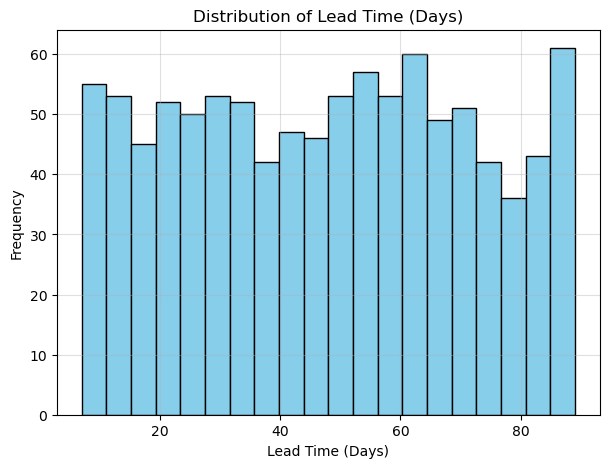

In [82]:
# 4. Histogram of Lead Time

plt.figure(figsize=(7,5))
plt.hist(df["Lead_Time_Days"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Lead Time (Days)")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Frequency")
plt.grid(alpha=0.4)
plt.show()

C:\Users\radha\AppData\Local\Temp\ipykernel_12712\1873540522.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Kraljic_Category", y="Cost_per_Unit", palette="Set2")


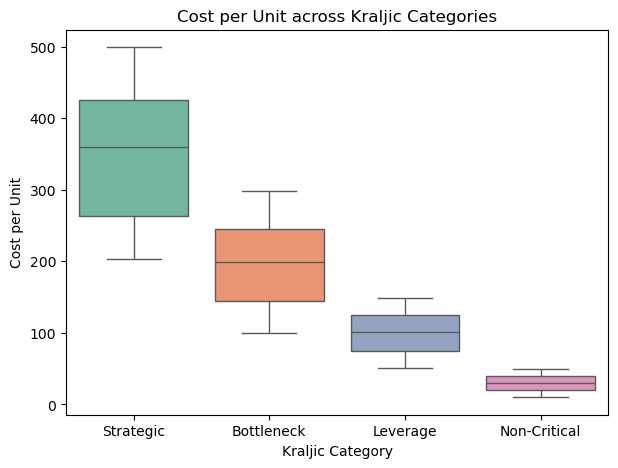

In [83]:
# 5. Boxplot of Cost per Unit by Kraljic Category

plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Kraljic_Category", y="Cost_per_Unit", palette="Set2")
plt.title("Cost per Unit across Kraljic Categories")
plt.xlabel("Kraljic Category")
plt.ylabel("Cost per Unit")
plt.show()

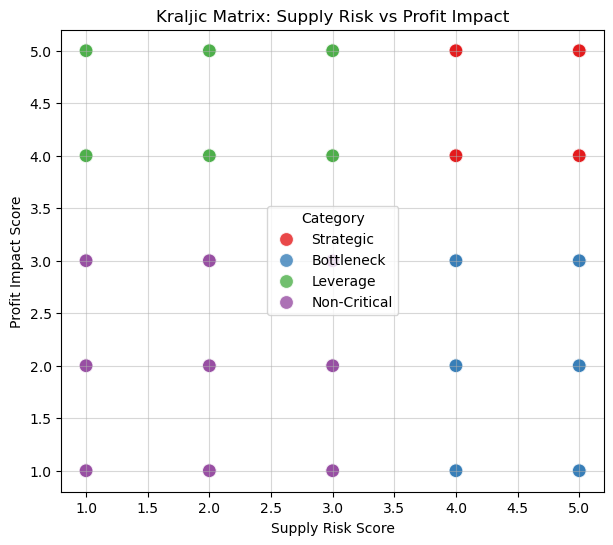

In [84]:
# 6. Scatter Plot (Kraljic Matrix)

plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df,
    x="Supply_Risk_Score",
    y="Profit_Impact_Score",
    hue="Kraljic_Category",
    palette="Set1",
    s=100,
    alpha=0.8
)
plt.title("Kraljic Matrix: Supply Risk vs Profit Impact")
plt.xlabel("Supply Risk Score")
plt.ylabel("Profit Impact Score")
plt.legend(title="Category")
plt.grid(alpha=0.5)
plt.show()


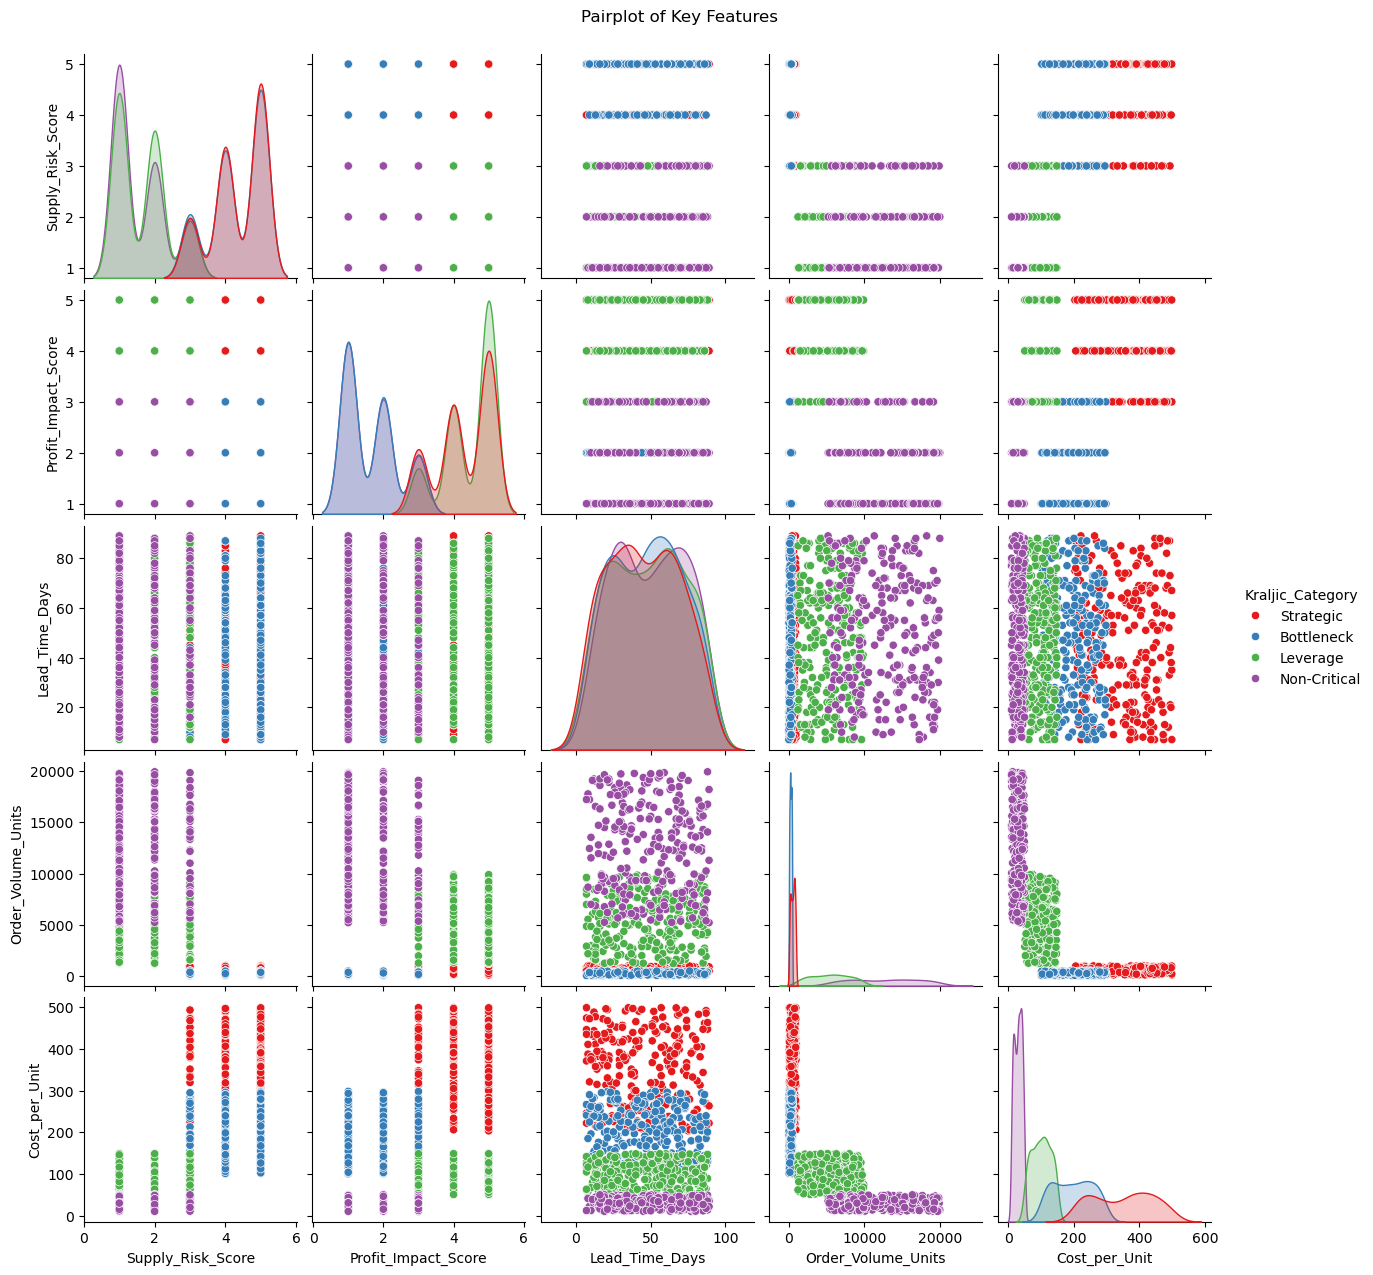

In [85]:
# 7. Pairplot of Key Features

sns.pairplot(df[["Supply_Risk_Score", "Profit_Impact_Score", "Lead_Time_Days",
                 "Order_Volume_Units", "Cost_per_Unit", "Kraljic_Category"]],
             hue="Kraljic_Category", palette="Set1")
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

C:\Users\radha\AppData\Local\Temp\ipykernel_12712\1048092944.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Kraljic_Category", palette="pastel")


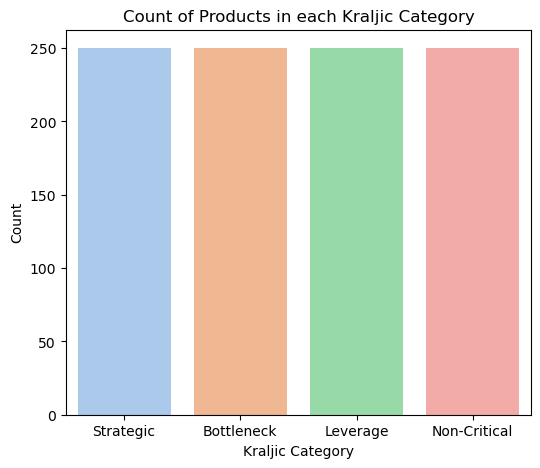

In [86]:
# 8. Countplot of Kraljic Categories

plt.figure(figsize=(6,5))
sns.countplot(data=df, x="Kraljic_Category", palette="pastel")
plt.title("Count of Products in each Kraljic Category")
plt.xlabel("Kraljic Category")
plt.ylabel("Count")
plt.show()

C:\Users\radha\AppData\Local\Temp\ipykernel_12712\3332644217.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Kraljic_Category", y="Order_Volume_Units", palette="muted")


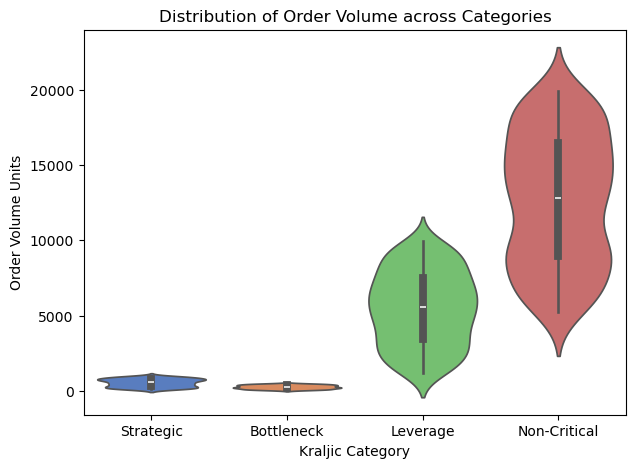

In [87]:
# 9. Violin Plot - Order Volume by Category

plt.figure(figsize=(7,5))
sns.violinplot(data=df, x="Kraljic_Category", y="Order_Volume_Units", palette="muted")
plt.title("Distribution of Order Volume across Categories")
plt.xlabel("Kraljic Category")
plt.ylabel("Order Volume Units")
plt.show()

In [88]:
# Features & Target
X = df[["Supply_Risk_Score", "Profit_Impact_Score", "Lead_Time_Days",
        "Order_Volume_Units", "Cost_per_Unit", "Environmental_Impact"]]
y = df["Kraljic_Category"]

In [89]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [90]:
# Train Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [91]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(random_state=42)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [92]:
# Predictions
y_pred = model.predict(X_test)

In [93]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

  Bottleneck       0.98      1.00      0.99        52
    Leverage       1.00      1.00      1.00        55
Non-Critical       1.00      1.00      1.00        49
   Strategic       1.00      0.98      0.99        44

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



In [94]:
from sklearn.linear_model import LogisticRegression
# Features & Target
X = df[["Supply_Risk_Score", "Profit_Impact_Score", "Lead_Time_Days",
        "Order_Volume_Units", "Cost_per_Unit", "Environmental_Impact"]]
y = df["Kraljic_Category"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train Model
model =  LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

  Bottleneck       0.87      0.90      0.89        52
    Leverage       0.98      0.96      0.97        55
Non-Critical       0.96      0.98      0.97        49
   Strategic       0.88      0.84      0.86        44

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



C:\Users\radha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
from sklearn.preprocessing import StandardScaler
#  Feature scaling (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [97]:
#  Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)  # you can tune n_neighbors
knn.fit(X_train, y_train)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [98]:
#  Predictions
y_pred = knn.predict(X_test)


In [100]:
from sklearn.metrics import accuracy_score
#  Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.965
Confusion Matrix:
 [[50  0  0  2]
 [ 0 55  0  0]
 [ 0  3 46  0]
 [ 2  0  0 42]]
Classification Report:
               precision    recall  f1-score   support

  Bottleneck       0.96      0.96      0.96        52
    Leverage       0.95      1.00      0.97        55
Non-Critical       1.00      0.94      0.97        49
   Strategic       0.95      0.95      0.95        44

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



In [101]:
#  Create a realistic Kraljic dataset
# Columns: cost_impact, supply_risk, supplier_score, category (target)
np.random.seed(42)
data = {
    "cost_impact": np.random.randint(1, 100, 200),
    "supply_risk": np.random.randint(1, 100, 200),
    "supplier_score": np.random.randint(50, 100, 200),
}

df = pd.DataFrame(data)

# Define categories based on Kraljic matrix logic
def classify_kraljic(row):
    if row["cost_impact"] > 50 and row["supply_risk"] > 50:
        return "Strategic"
    elif row["cost_impact"] > 50 and row["supply_risk"] <= 50:
        return "Leverage"
    elif row["cost_impact"] <= 50 and row["supply_risk"] > 50:
        return "Bottleneck"
    else:
        return "Non-critical"

df["category"] = df.apply(classify_kraljic, axis=1)

print(df.head())


   cost_impact  supply_risk  supplier_score    category
0           52           37              75    Leverage
1           93           97              66   Strategic
2           15           51              89  Bottleneck
3           72           44              82    Leverage
4           61           24              58    Leverage


In [103]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))



KNN Classification Report:
              precision    recall  f1-score   support

  Bottleneck       0.96      0.96      0.96        52
    Leverage       0.95      1.00      0.97        55
Non-Critical       1.00      0.94      0.97        49
   Strategic       0.95      0.95      0.95        44

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200

KNN Confusion Matrix:
[[50  0  0  2]
 [ 0 55  0  0]
 [ 0  3 46  0]
 [ 2  0  0 42]]


In [104]:
# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)

print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

  Bottleneck       0.98      1.00      0.99        52
    Leverage       1.00      1.00      1.00        55
Non-Critical       1.00      1.00      1.00        49
   Strategic       1.00      0.98      0.99        44

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

Naive Bayes Confusion Matrix:
[[52  0  0  0]
 [ 0 55  0  0]
 [ 0  0 49  0]
 [ 1  0  0 43]]


In [122]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Proper target names
target_names = df['category'].astype('category').cat.categories.astype(str)

# Classification Report
report = classification_report(y_test, y_pred, target_names=target_names)
print("\nClassification Report:\n", report)


Confusion Matrix:
 [[38  2 12  0]
 [ 0  2 53  0]
 [ 0  0 49  0]
 [41  0  0  3]]

Classification Report:
               precision    recall  f1-score   support

  Bottleneck       0.48      0.73      0.58        52
    Leverage       0.50      0.04      0.07        55
Non-critical       0.43      1.00      0.60        49
   Strategic       1.00      0.07      0.13        44

    accuracy                           0.46       200
   macro avg       0.60      0.46      0.34       200
weighted avg       0.59      0.46      0.34       200



C:\Users\radha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [113]:
#It looks like you want to work with a realistic Kraljic dataset and perform prediction. Let me clarify a few things so we can set this up properly:
#What the Kraljic Matrix is...
#The Kraljic Matrix is a supply chain and procurement tool that classifies products/supplies into four categories based on:

#1.- Profit impact (high/low)
#2.- Supply risk (high/low)

#The four quadrants are:
#1.- Non-critical items (low impact, low risk)
#2.- Leverage items (high impact, low risk)
#3.- Bottleneck items (low impact, high risk)
#4.- Strategic items (high impact, high risk)

#Realistic Dataset Structure
#A dataset for prediction would typically include features like:
#1.- Supplier reliability (on-time delivery %, defect rate)
#2.- Market volatility (price fluctuations, availability index)
#3.- Spend value (annual procurement cost, % of total spend)
#4.- Criticality (impact on operations, substitution difficulty)
#5.- Risk indicators (geopolitical risk, single-source dependency)
#6.And the target variable would be the Kraljic category (one of the four quadrants).

#Prediction Approach
# this is a classification problem, you can use models like:
#1.- Logistic Regression
#2.- Decision Trees / Random Forest
#3.- KNN
#4.- Naive Bayes
#Given your skills (pandas, seaborn, classification models), you could:
#1.- Load the dataset (CSV or SQL table).
#2.- Perform EDA (check distributions, correlations).
#3.- Encode categorical variables (supplier region, risk levels).
#4.- Split into train/test sets.
#5.- Train classifiers and compare accuracy, precision, recall.
#6.- Visualize decision boundaries or feature importance.
